Import all the librarires needed: pandas, matpotlib.pyplot, and seaborn

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('/Users/mac/Downloads/Bank_Finance_Data.csv')

Displaying first 10 rows of the dataframe

In [93]:
df.head(10)

,Transaction ID,Date,Category,Description,Amount
0,1,2023-01-01,Loans,Loan payment,500.0
1,2,2023-01-03,Deposits,Salary deposit,2000.0
2,3,2023-01-04,Expenses,Groceries,100.0
3,4,2023-01-06,Investments,Stock purchase,300.0
4,5,2023-01-07,Expenses,Utilities bill,50.0
5,6,2023-01-10,Loans,Loan payment,250.0
6,7,2023-01-12,Deposits,Interest deposit,100.0
7,8,2023-01-13,Expenses,Dining out,75.0
8,9,2023-01-15,Investments,Mutual fund purchase,400.0
9,10,2023-01-16,Expenses,Shopping,200.0


Checking the dataypes of each column

In [24]:
print(df.dtypes)

Transaction ID      int64
Date               object
Category           object
Description        object
Amount            float64
dtype: object


In [32]:
# Count the number of unique options in a column
category_unique_count = df['Category'].nunique()
print(category_unique_count)

# Get all unique values in a column
category_unique_values = df['Category'].unique()
print(category_unique_values)

4
['Loans' 'Deposits' 'Expenses' 'Investments']


Create summary statistics using describe() function

In [33]:
summary_statistics = df.describe()

print(summary_statistics)

       Transaction ID       Amount
count      100.000000   100.000000
mean        50.500000   320.050000
std         29.011492   543.433944
min          1.000000    50.000000
25%         25.750000   100.000000
50%         50.500000   150.000000
75%         75.250000   285.000000
max        100.000000  2700.000000


Calculating common statistical measures


In [38]:
amount_mean = df['Amount'].mean()
amount_median = df['Amount'].median()
amount_min = df['Amount'].min()
amount_max = df['Amount'].max()

print("Mean Amount:", amount_mean)
print("Median Amount:", amount_median)
print("Min. Amount:", amount_min)
print("Max. Amount:", amount_max)

Mean Amount: 320.05
Median Amount: 150.0
Min. Amount: 50.0
Max. Amount: 2700.0


Retrive the certain amount (example: retrive the information of the 19th highest amount)

In [49]:
# Retrieve the 19th highest amount from a dataset of 100 rows
nineteenth_highest = df['Amount'].nlargest(19).tail(1).values[0]
print(nineteenth_highest)

350.0


In [60]:
# Retrieve rows with the 19th highest amount from a dataset of 100 rows
nineteenth_highest = df.nlargest(19, 'Amount').tail(1)
print(nineteenth_highest)


    Transaction ID        Date     Category           Description  Amount
28              29  2023-02-26  Investments  Mutual fund purchase   350.0


Filtering transaction based on the transaction date (per month or quarter)

In [91]:
# Convert 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Filter transactions for January
january_transactions = df[df['Date'].dt.month == 1 ]
quarter1_transactions = df[df['Date'].dt.month < 4]

# Print the January transactions
#print(january_transactions)

print(quarter1_transactions)

#Print the largest amount transaction from Q1
quarter1_max_amount = quarter1_transactions.nlargest(1, 'Amount')

print(quarter1_max_amount)

    Transaction ID       Date     Category           Description  Amount
0                1 2023-01-01        Loans          Loan payment   500.0
1                2 2023-01-03     Deposits        Salary deposit  2000.0
2                3 2023-01-04     Expenses             Groceries   100.0
3                4 2023-01-06  Investments        Stock purchase   300.0
4                5 2023-01-07     Expenses        Utilities bill    50.0
5                6 2023-01-10        Loans          Loan payment   250.0
6                7 2023-01-12     Deposits      Interest deposit   100.0
7                8 2023-01-13     Expenses            Dining out    75.0
8                9 2023-01-15  Investments  Mutual fund purchase   400.0
9               10 2023-01-16     Expenses              Shopping   200.0
10              11 2023-01-20        Loans          Loan payment   300.0
11              12 2023-01-22     Deposits      Dividend deposit   150.0
12              13 2023-01-23     Expenses         

Creating the line plot


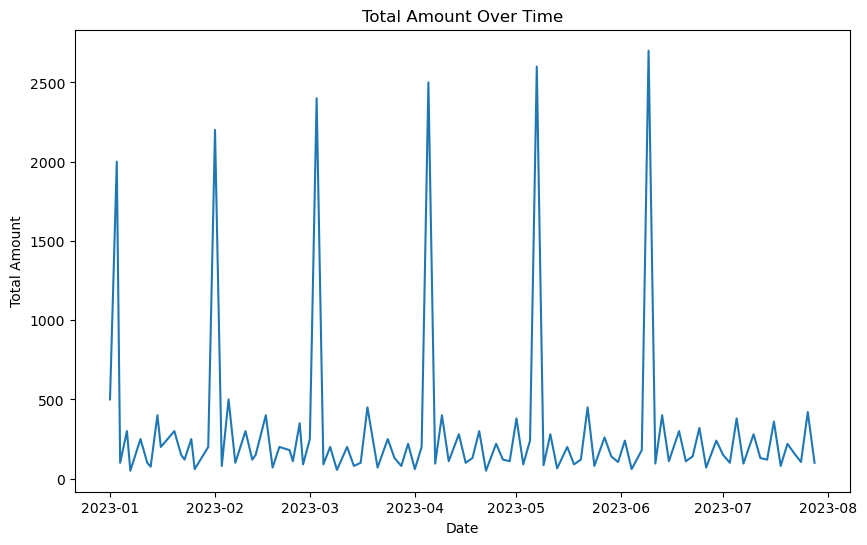

In [97]:

# Group data by date and calculate the total amount
grouped_date = df.groupby('Date')['Amount'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Amount', data=grouped_date)
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Total Amount Over Time')
plt.xticks(rotation=0)
plt.show()


Creating the bar plot

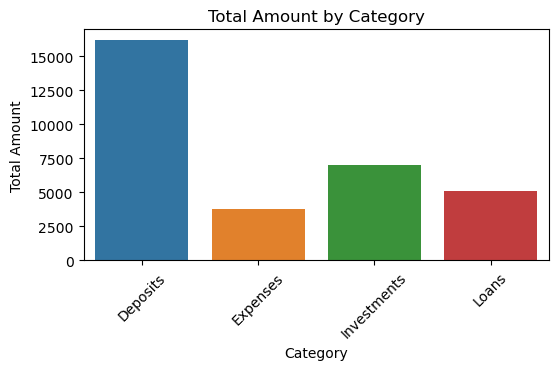

In [101]:
# Group data by category and calculate total amount
grouped_category = df.groupby('Category')['Amount'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(6, 3))
sns.barplot(x='Category', y='Amount', data=grouped_category)
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.title('Total Amount by Category')
plt.xticks(rotation=45)
plt.show()


Create the pie chart (for showing Expense Distribution by Category)

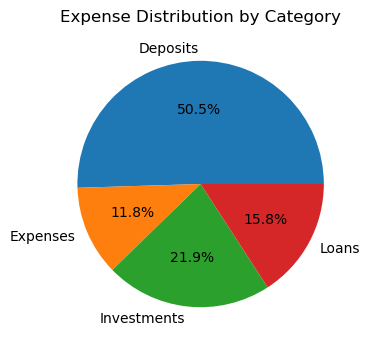

In [102]:
# Group data by category and calculate total amount
grouped_category = df.groupby('Category')['Amount'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(grouped_category['Amount'], labels=grouped_category['Category'], autopct='%1.1f%%')
plt.title('Expense Distribution by Category')
plt.show()


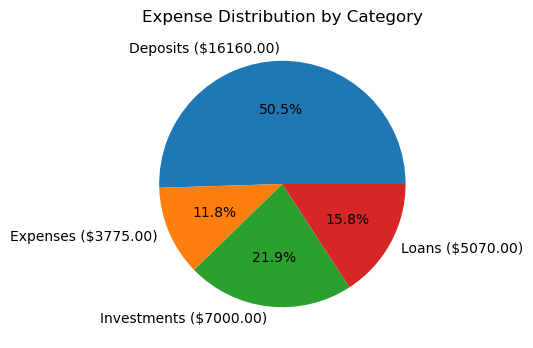

In [103]:

# Group data by category and calculate total amount
grouped_category = df.groupby('Category')['Amount'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(grouped_category['Amount'], labels=grouped_category.apply(lambda x: f"{x['Category']} (${x['Amount']:.2f})", axis=1), autopct='%1.1f%%')
plt.title('Expense Distribution by Category')
plt.show()
